In [1]:
# ============================================================================
# 1. IMPORTS AND SETUP
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")




✅ Libraries imported successfully
Pandas version: 2.3.3
NumPy version: 2.3.4


In [2]:
# ============================================================================
# 2. DATA LOADING
# ============================================================================

# Load the dataset
data_path = '../data/raw/agaricus-lepiota.data'

try:
    df = pd.read_csv(data_path)
    print(f"\n✅ Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ Error: File not found at {data_path}")
    print("Please ensure the dataset is in the correct location")


✅ Dataset loaded successfully!
Shape: (8123, 23)


In [3]:
# ============================================================================
# 3. INITIAL DATA INSPECTION
# ============================================================================

print("\n" + "="*80)
print("INITIAL DATA INSPECTION")
print("="*80)

# Display first rows
print("\n📊 First 10 rows of the dataset:")
print(df.head(10))

# Display last rows
print("\n📊 Last 5 rows of the dataset:")
print(df.tail())

# Display random sample
print("\n📊 Random sample of 5 rows:")
print(df.sample(5, random_state=42))


INITIAL DATA INSPECTION

📊 First 10 rows of the dataset:
   p  x  s  n  t p.1  f  c n.1  k  e e.1 s.1 s.2  w w.1 p.2 w.2  o p.3 k.1  \
0  e  x  s  y  t   a  f  c   b  k  e   c   s   s  w   w   p   w  o   p   n   
1  e  b  s  w  t   l  f  c   b  n  e   c   s   s  w   w   p   w  o   p   n   
2  p  x  y  w  t   p  f  c   n  n  e   e   s   s  w   w   p   w  o   p   k   
3  e  x  s  g  f   n  f  w   b  k  t   e   s   s  w   w   p   w  o   e   n   
4  e  x  y  y  t   a  f  c   b  n  e   c   s   s  w   w   p   w  o   p   k   
5  e  b  s  w  t   a  f  c   b  g  e   c   s   s  w   w   p   w  o   p   k   
6  e  b  y  w  t   l  f  c   b  n  e   c   s   s  w   w   p   w  o   p   n   
7  p  x  y  w  t   p  f  c   n  p  e   e   s   s  w   w   p   w  o   p   k   
8  e  b  s  y  t   a  f  c   b  g  e   c   s   s  w   w   p   w  o   p   k   
9  e  x  y  y  t   l  f  c   b  g  e   c   s   s  w   w   p   w  o   p   n   

  s.3  u  
0   n  g  
1   n  m  
2   s  u  
3   a  g  
4   n  g  
5   n  m  
6   s 

In [4]:
# ============================================================================
# 4. DATASET STRUCTURE AND INFORMATION
# ============================================================================

print("\n" + "="*80)
print("DATASET STRUCTURE")
print("="*80)

# Basic information
print(f"\n📏 Dataset Dimensions:")
print(f"   - Number of rows (samples): {df.shape[0]:,}")
print(f"   - Number of columns (features): {df.shape[1]}")
print(f"   - Total cells: {df.shape[0] * df.shape[1]:,}")

# Memory usage
memory_usage = df.memory_usage(deep=True).sum() / 1024**2
print(f"\n💾 Memory Usage: {memory_usage:.2f} MB")

# Data types information
print("\n📋 Data Types Summary:")
print(df.dtypes.value_counts())

print("\n📋 Detailed Column Information:")
print(df.info())


DATASET STRUCTURE

📏 Dataset Dimensions:
   - Number of rows (samples): 8,123
   - Number of columns (features): 23
   - Total cells: 186,829

💾 Memory Usage: 8.91 MB

📋 Data Types Summary:
object    23
Name: count, dtype: int64

📋 Detailed Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 n

In [5]:
# ============================================================================
# 5. NULL VALUES ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("NULL VALUES ANALYSIS")
print("="*80)

# Count nulls per column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Create null analysis dataframe
null_analysis = pd.DataFrame({
    'Feature': df.columns,
    'Null_Count': null_counts.values,
    'Null_Percentage': null_percentages.values,
    'Non_Null_Count': df.notnull().sum().values,
    'Data_Type': df.dtypes.values
})

null_analysis = null_analysis.sort_values('Null_Count', ascending=False)

print("\n🔍 Null Values Summary:")
print(null_analysis)

# Overall null statistics
total_nulls = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
null_percentage = (total_nulls / total_cells) * 100

print(f"\n📊 Overall Null Statistics:")
print(f"   - Total null values: {total_nulls:,}")
print(f"   - Total cells: {total_cells:,}")
print(f"   - Overall null percentage: {null_percentage:.4f}%")

if total_nulls == 0:
    print("\n✅ Great! No null values found in the dataset")
else:
    print(f"\n⚠️  Found {total_nulls:,} null values across the dataset")

# Visualize null values
if total_nulls > 0:
    plt.figure(figsize=(12, 6))
    null_data = null_analysis[null_analysis['Null_Count'] > 0]
    plt.barh(null_data['Feature'], null_data['Null_Percentage'])
    plt.xlabel('Null Percentage (%)')
    plt.title('Null Values Distribution Across Features')
    plt.tight_layout()
    plt.savefig('../results/figures/null_values_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()


NULL VALUES ANALYSIS

🔍 Null Values Summary:
   Feature  Null_Count  Null_Percentage  Non_Null_Count Data_Type
0        p           0              0.0            8123    object
1        x           0              0.0            8123    object
2        s           0              0.0            8123    object
3        n           0              0.0            8123    object
4        t           0              0.0            8123    object
5      p.1           0              0.0            8123    object
6        f           0              0.0            8123    object
7        c           0              0.0            8123    object
8      n.1           0              0.0            8123    object
9        k           0              0.0            8123    object
10       e           0              0.0            8123    object
11     e.1           0              0.0            8123    object
12     s.1           0              0.0            8123    object
13     s.2           0        

In [6]:
# ============================================================================
# 6. UNIQUE VALUES ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("UNIQUE VALUES ANALYSIS")
print("="*80)

# Create unique values dataframe
unique_values_data = []

for column in df.columns:
    unique_vals = df[column].unique()
    n_unique = len(unique_vals)
    unique_values_data.append({
        'Feature': column,
        'n_values': n_unique,
        'Unique_Values': sorted(unique_vals) if n_unique <= 20 else f"{n_unique} unique values",
        'Most_Common': df[column].mode()[0] if len(df[column].mode()) > 0 else None,
        'Most_Common_Count': df[column].value_counts().iloc[0] if len(df[column]) > 0 else 0
    })

# Create dataframe with unique values
df_unique = pd.DataFrame(unique_values_data)
df_unique = df_unique.sort_values('n_values', ascending=False)

print("\n📊 Unique Values Summary (sorted by number of unique values):")
print(df_unique[['Feature', 'n_values']])

print("\n📊 Detailed Unique Values Information:")
for idx, row in df_unique.iterrows():
    print(f"\n{row['Feature']}:")
    print(f"   - Number of unique values: {row['n_values']}")
    print(f"   - Unique values: {row['Unique_Values']}")
    print(f"   - Most common: '{row['Most_Common']}' (appears {row['Most_Common_Count']} times)")



UNIQUE VALUES ANALYSIS

📊 Unique Values Summary (sorted by number of unique values):
   Feature  n_values
9        k        12
3        n        10
5      p.1         9
15     w.1         9
20     k.1         9
14       w         9
22       u         7
1        x         6
21     s.3         6
11     e.1         5
19     p.3         5
12     s.1         4
17     w.2         4
13     s.2         4
2        s         4
18       o         3
6        f         2
0        p         2
4        t         2
8      n.1         2
7        c         2
10       e         2
16     p.2         1

📊 Detailed Unique Values Information:

k:
   - Number of unique values: 12
   - Unique values: ['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y']
   - Most common: 'b' (appears 1728 times)

n:
   - Number of unique values: 10
   - Unique values: ['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']
   - Most common: 'n' (appears 2283 times)

p.1:
   - Number of unique values: 9
   - Unique values: [

This code will:

1. **Extract** just the `Feature` and `n_values` columns from your existing `df_unique` dataframe
2. **Sort** by number of unique values (highest to lowest)
3. **Display** the results in a clean format
4. **Save** to a CSV file
5. **Create** a visual bar representation

The output will look like:
```
Feature  n_values
k              12
n              10
p.1             9
w.1             9
k.1             9
...

In [13]:
# ============================================================================
# CREATE SIMPLIFIED DATAFRAME WITH FEATURES AND n_values
# ============================================================================

print("\n" + "="*80)
print("FEATURES AND UNIQUE VALUES SUMMARY")
print("="*80)

# Create the simplified dataframe with just Feature and n_values
df_features_summary = df_unique[['Feature', 'n_values']].copy()

# Sort by n_values in descending order
df_features_summary = df_features_summary.sort_values('n_values', ascending=False).reset_index(drop=True)

print("\n📊 Features with their Unique Value Counts:")
print(df_features_summary.to_string(index=False))

# Save this dataframe
df_features_summary.to_csv('../results/reports/features_unique_values.csv', index=False)
print("\n✅ Saved to: results/reports/features_unique_values.csv")

# Optional: Create a more visual representation
print("\n" + "="*80)
print("VISUAL REPRESENTATION")
print("="*80)

for idx, row in df_features_summary.iterrows():
    feature = row['Feature']
    n_vals = row['n_values']
    bar = '█' * n_vals
    print(f"{feature:8s} | {bar} ({n_vals})")



FEATURES AND UNIQUE VALUES SUMMARY

📊 Features with their Unique Value Counts:
Feature  n_values
      k        12
      n        10
    p.1         9
    w.1         9
    k.1         9
      w         9
      u         7
      x         6
    s.3         6
    e.1         5
    p.3         5
    s.1         4
    w.2         4
    s.2         4
      s         4
      o         3
      f         2
      p         2
      t         2
    n.1         2
      c         2
      e         2
    p.2         1

✅ Saved to: results/reports/features_unique_values.csv

VISUAL REPRESENTATION
k        | ████████████ (12)
n        | ██████████ (10)
p.1      | █████████ (9)
w.1      | █████████ (9)
k.1      | █████████ (9)
w        | █████████ (9)
u        | ███████ (7)
x        | ██████ (6)
s.3      | ██████ (6)
e.1      | █████ (5)
p.3      | █████ (5)
s.1      | ████ (4)
w.2      | ████ (4)
s.2      | ████ (4)
s        | ████ (4)
o        | ███ (3)
f        | ██ (2)
p        | ██ (2)
t        

In [7]:
# ============================================================================
# 7. UNUSUAL VALUES DETECTION
# ============================================================================

print("\n" + "="*80)
print("UNUSUAL VALUES DETECTION")
print("="*80)

# Check for unusual patterns
unusual_findings = []

for column in df.columns:
    # Check for single character values (might be codes)
    unique_vals = df[column].unique()
    
    # Check if all values are single characters
    all_single_char = all(isinstance(val, str) and len(str(val)) == 1 for val in unique_vals if pd.notna(val))
    
    if all_single_char:
        unusual_findings.append({
            'Feature': column,
            'Finding': 'All values are single characters (likely encoded)',
            'Values': sorted([str(v) for v in unique_vals])
        })
    
    # Check for features with only one unique value
    if len(unique_vals) == 1:
        unusual_findings.append({
            'Feature': column,
            'Finding': 'Only one unique value (constant feature)',
            'Values': unique_vals[0]
        })
    
    # Check for features with very few unique values
    if len(unique_vals) == 2:
        unusual_findings.append({
            'Feature': column,
            'Finding': 'Binary feature',
            'Values': sorted([str(v) for v in unique_vals])
        })

print("\n🔍 Unusual Values Findings:")
if unusual_findings:
    for finding in unusual_findings:
        print(f"\n{finding['Feature']}:")
        print(f"   - {finding['Finding']}")
        print(f"   - Values: {finding['Values']}")
else:
    print("No unusual values detected")


UNUSUAL VALUES DETECTION

🔍 Unusual Values Findings:

p:
   - All values are single characters (likely encoded)
   - Values: ['e', 'p']

p:
   - Binary feature
   - Values: ['e', 'p']

x:
   - All values are single characters (likely encoded)
   - Values: ['b', 'c', 'f', 'k', 's', 'x']

s:
   - All values are single characters (likely encoded)
   - Values: ['f', 'g', 's', 'y']

n:
   - All values are single characters (likely encoded)
   - Values: ['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']

t:
   - All values are single characters (likely encoded)
   - Values: ['f', 't']

t:
   - Binary feature
   - Values: ['f', 't']

p.1:
   - All values are single characters (likely encoded)
   - Values: ['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']

f:
   - All values are single characters (likely encoded)
   - Values: ['a', 'f']

f:
   - Binary feature
   - Values: ['a', 'f']

c:
   - All values are single characters (likely encoded)
   - Values: ['c', 'w']

c:
   - Binary feature
   - Va


CARDINALITY ANALYSIS

📊 Feature Cardinality Distribution:
   - Binary features (2 values): 6
   - Low cardinality (3-5 values): 7
   - Medium cardinality (6-10 values): 8
   - High cardinality (>10 values): 1


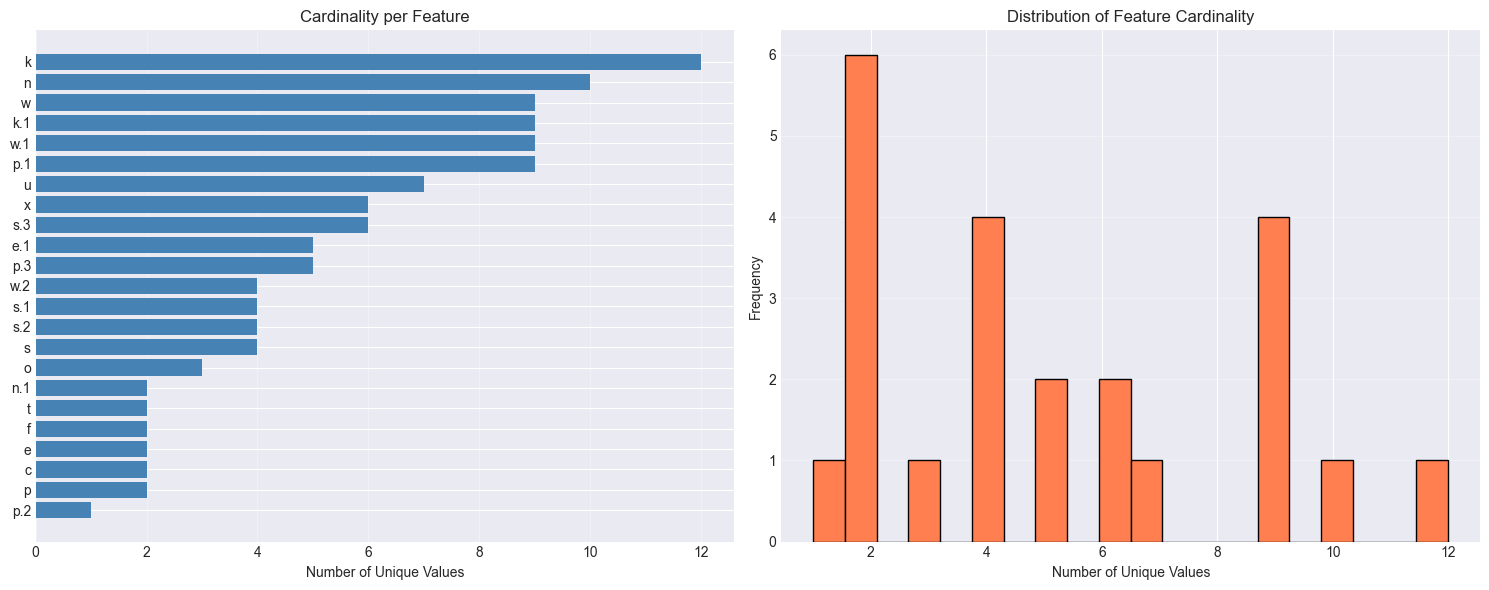

In [8]:
# ============================================================================
# 8. CARDINALITY ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("CARDINALITY ANALYSIS")
print("="*80)

# Categorize features by cardinality
binary_features = df_unique[df_unique['n_values'] == 2]['Feature'].tolist()
low_cardinality = df_unique[(df_unique['n_values'] > 2) & (df_unique['n_values'] <= 5)]['Feature'].tolist()
medium_cardinality = df_unique[(df_unique['n_values'] > 5) & (df_unique['n_values'] <= 10)]['Feature'].tolist()
high_cardinality = df_unique[df_unique['n_values'] > 10]['Feature'].tolist()

print(f"\n📊 Feature Cardinality Distribution:")
print(f"   - Binary features (2 values): {len(binary_features)}")
print(f"   - Low cardinality (3-5 values): {len(low_cardinality)}")
print(f"   - Medium cardinality (6-10 values): {len(medium_cardinality)}")
print(f"   - High cardinality (>10 values): {len(high_cardinality)}")

# Visualize cardinality distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot of unique values per feature
df_unique_sorted = df_unique.sort_values('n_values', ascending=True)
axes[0].barh(df_unique_sorted['Feature'], df_unique_sorted['n_values'], color='steelblue')
axes[0].set_xlabel('Number of Unique Values')
axes[0].set_title('Cardinality per Feature')
axes[0].grid(axis='x', alpha=0.3)

# Histogram of cardinality distribution
axes[1].hist(df_unique['n_values'], bins=20, color='coral', edgecolor='black')
axes[1].set_xlabel('Number of Unique Values')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Feature Cardinality')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/cardinality_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# ============================================================================
# 9. STATISTICAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

# For categorical data, show value counts for each feature
print("\n📊 Value Distribution Summary (Top 3 values per feature):")

for column in df.columns[:5]:  # Show first 5 features as example
    print(f"\n{column}:")
    print(df[column].value_counts().head(3))

# Describe the dataset
print("\n📊 Dataset Description:")
print(df.describe(include='all'))


STATISTICAL SUMMARY

📊 Value Distribution Summary (Top 3 values per feature):

p:
p
e    4208
p    3915
Name: count, dtype: int64

x:
x
x    3655
f    3152
k     828
Name: count, dtype: int64

s:
s
y    3244
s    2555
f    2320
Name: count, dtype: int64

n:
n
n    2283
g    1840
e    1500
Name: count, dtype: int64

t:
t
f    4748
t    3375
Name: count, dtype: int64

📊 Dataset Description:
           p     x     s     n     t   p.1     f     c   n.1     k     e  \
count   8123  8123  8123  8123  8123  8123  8123  8123  8123  8123  8123   
unique     2     6     4    10     2     9     2     2     2    12     2   
top        e     x     y     n     f     n     f     c     b     b     t   
freq    4208  3655  3244  2283  4748  3528  7913  6811  5612  1728  4608   

         e.1   s.1   s.2     w   w.1   p.2   w.2     o   p.3   k.1   s.3     u  
count   8123  8123  8123  8123  8123  8123  8123  8123  8123  8123  8123  8123  
unique     5     4     4     9     9     1     4     3     5    

In [11]:
# ============================================================================
# 10. SAVE PROCESSED DATAFRAMES
# ============================================================================

print("\n" + "="*80)
print("SAVING ANALYSIS RESULTS")
print("="*80)

# Save null analysis
null_analysis.to_csv('../results/reports/null_values_analysis.csv', index=False)
print("✅ Null analysis saved to: results/reports/null_values_analysis.csv")

# Save unique values analysis
df_unique.to_csv('../results/reports/unique_values_analysis.csv', index=False)
print("✅ Unique values analysis saved to: results/reports/unique_values_analysis.csv")

# Save summary statistics
summary_stats = {
    'total_rows': df.shape[0],
    'total_columns': df.shape[1],
    'total_nulls': total_nulls,
    'null_percentage': null_percentage,
    'memory_usage_mb': memory_usage,
    'binary_features': len(binary_features),
    'low_cardinality_features': len(low_cardinality),
    'medium_cardinality_features': len(medium_cardinality),
    'high_cardinality_features': len(high_cardinality)
}

pd.DataFrame([summary_stats]).to_csv('../results/reports/dataset_summary.csv', index=False)
print("✅ Dataset summary saved to: results/reports/dataset_summary.csv")



SAVING ANALYSIS RESULTS
✅ Null analysis saved to: results/reports/null_values_analysis.csv
✅ Unique values analysis saved to: results/reports/unique_values_analysis.csv
✅ Dataset summary saved to: results/reports/dataset_summary.csv


In [12]:
# ============================================================================
# 11. KEY FINDINGS AND OBSERVATIONS
# ============================================================================

print("\n" + "="*80)
print("KEY FINDINGS AND OBSERVATIONS")
print("="*80)

print(f"""
📋 DATASET OVERVIEW:
   - Total samples: {df.shape[0]:,}
   - Total features: {df.shape[1]}
   - Data quality: {'Excellent (no missing values)' if total_nulls == 0 else f'{total_nulls:,} missing values'}
   
🔍 FEATURE CHARACTERISTICS:
   - All features appear to be categorical (object type)
   - All values are single-character codes (encoded data)
   - Feature cardinality ranges from {df_unique['n_values'].min()} to {df_unique['n_values'].max()} unique values
   
⚠️  IMPORTANT NOTES:
   - This dataset contains encoded categorical variables
   - Column names contain duplicates (e.g., 'p', 'p.1', 'p.2', 'p.3')
   - Need to identify proper feature names from data dictionary
   - All features will require encoding for machine learning algorithms
   
🎯 NEXT STEPS:
   1. Obtain data dictionary to understand feature meanings
   2. Rename columns with meaningful names
   3. Perform encoding (Label Encoding or One-Hot Encoding)
   4. Analyze feature distributions
   5. Check for class imbalance (if classification task)
   6. Identify correlations between features
""")

print("\n" + "="*80)
print("EDA COMPLETED SUCCESSFULLY! ✅")
print("="*80)


KEY FINDINGS AND OBSERVATIONS

📋 DATASET OVERVIEW:
   - Total samples: 8,123
   - Total features: 23
   - Data quality: Excellent (no missing values)

🔍 FEATURE CHARACTERISTICS:
   - All features appear to be categorical (object type)
   - All values are single-character codes (encoded data)
   - Feature cardinality ranges from 1 to 12 unique values

⚠️  IMPORTANT NOTES:
   - This dataset contains encoded categorical variables
   - Column names contain duplicates (e.g., 'p', 'p.1', 'p.2', 'p.3')
   - Need to identify proper feature names from data dictionary
   - All features will require encoding for machine learning algorithms

🎯 NEXT STEPS:
   1. Obtain data dictionary to understand feature meanings
   2. Rename columns with meaningful names
   3. Perform encoding (Label Encoding or One-Hot Encoding)
   4. Analyze feature distributions
   5. Check for class imbalance (if classification task)
   6. Identify correlations between features


EDA COMPLETED SUCCESSFULLY! ✅
